# Car Prices

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import requests

# UC Irvine Machine Learning Repository
# http://archive.ics.uci.edu/ml/datasets/Automobile

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = requests.get(url)

In [16]:
header = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price',

]

In [29]:
from io import StringIO

df = pd.read_csv(
    StringIO(data.text), 
    names=header,
    sep=","
) 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 197 non-null object
stroke               197 non-null object
compression-ratio    201 non-null float64
horsepower           199 non-null object
peak-rpm             199 non-nul

In [30]:
df = df.applymap(
    lambda cell: np.nan if cell == '?' else cell
)

In [31]:
cols_with_missing = df.isnull().sum()

In [32]:
cols_with_missing[
    cols_with_missing > 0
]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [33]:
df = df[~df['price'].isnull()]

In [38]:
df.drop(labels=['normalized-losses'], axis=1, inplace=True)

In [40]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [44]:
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 10)

In [45]:
df.head(5)

,symboling,make,fuel-type,aspiration,num-of-doors,...,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,...,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,...,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,...,154,5000,19,26,16500
3,2,audi,gas,std,four,...,102,5500,24,30,13950
4,2,audi,gas,std,four,...,115,5500,18,22,17450


In [52]:
features = {
    'categorical': [
        'make', 'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location', 
        'engine-type', 'num-of-cylinders', 'fuel-system',
        
    ],
    'numerical': [
        'symboling', 'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-size', 'bore', 'stroke', 
        'compression-ratio', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 
    ],
}

features['all'] = features['categorical'] + features['numerical']

target = 'price'

In [333]:
df[features['numerical']] = df[features['numerical']].astype(np.float64)
df[target] = df[target].astype(np.float64) / 1000

In [334]:
df[features['categorical']].head(4)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi


In [335]:
df[features['numerical']].head(4)

,symboling,wheel-base,length,width,height,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3.0,88.6,168.8,64.1,48.8,...,9.0,111.0,5000.0,21.0,27.0
1,3.0,88.6,168.8,64.1,48.8,...,9.0,111.0,5000.0,21.0,27.0
2,1.0,94.5,171.2,65.5,52.4,...,9.0,154.0,5000.0,19.0,26.0
3,2.0,99.8,176.6,66.2,54.3,...,10.0,102.0,5500.0,24.0,30.0


In [336]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=22)

In [337]:
x_train = df_train[features['all']]
x_test  = df_test[features['all']]

y_train = df_train[target]
y_test  = df_test[target]

In [338]:
y_train.describe()

count    150.000000
mean      13.724267
std        8.224519
min        5.118000
25%        7.961500
50%       11.072000
75%       16.678750
max       45.400000
Name: price, dtype: float64

In [339]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

x_train = imp.fit_transform(x_train)
x_test = imp.transform(x_test)

x_train = pd.DataFrame(x_train, columns=features['all'])
x_test = pd.DataFrame(x_test, columns=features['all'])

In [340]:
print(
    'Missing values in train: {}, and in test: {}'.format(
        x_train.isnull().sum().sum(),
        x_test.isnull().sum().sum(),
    )
) 

Missing values in train: 0, and in test: 0


In [341]:
x_train.head(4)

,make,fuel-type,aspiration,num-of-doors,body-style,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,volkswagen,diesel,std,four,sedan,...,23,52,4800,37,46
1,mercury,gas,turbo,two,hatchback,...,8,175,5000,19,24
2,nissan,gas,std,four,wagon,...,9.4,69,5200,31,37
3,toyota,gas,std,two,hatchback,...,9.3,161,5200,20,24


In [342]:
from category_encoders.ordinal import OrdinalEncoder

enc = OrdinalEncoder(
    cols=features['categorical'],
    handle_unknown='value'
)

x_train = enc.fit_transform(x_train)
x_test = enc.transform(x_test)

In [343]:
x_train.head(4)

,make,fuel-type,aspiration,num-of-doors,body-style,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,1,1,1,1,...,23,52,4800,37,46
1,2,2,2,2,2,...,8,175,5000,19,24
2,3,2,1,1,3,...,9.4,69,5200,31,37
3,4,2,1,2,2,...,9.3,161,5200,20,24


## Random Forest

In [709]:
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor(
    n_estimators=200,
    oob_score=True,
    n_jobs=-1,
)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [710]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.90, RMSE: 2.15, MAE: 1.39


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


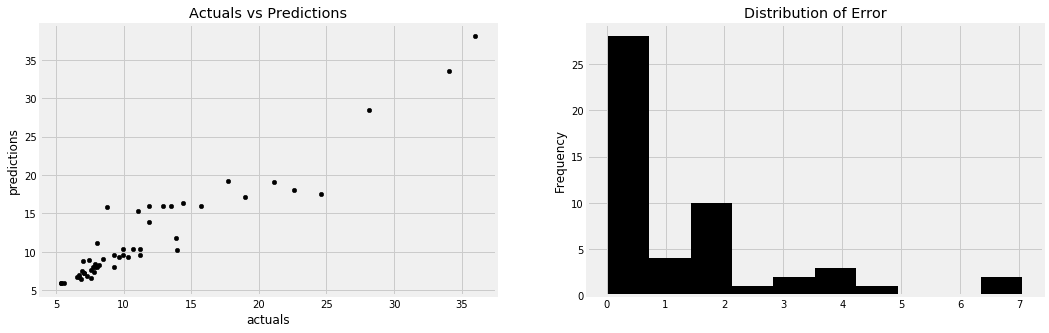

In [711]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()

In [716]:
df_feature_importances = pd.DataFrame(
    {
        'Feature': x_train.columns,
        'Importance': rgr.feature_importances_,
    }
).sort_values(
    'Importance', ascending=False
)

df_feature_importances.head(8)

,Feature,Importance
16,engine-size,0.651127
15,curb-weight,0.224749
23,highway-mpg,0.037382
13,width,0.011677
20,horsepower,0.010909
22,city-mpg,0.010908
12,length,0.006653
19,compression-ratio,0.006623


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


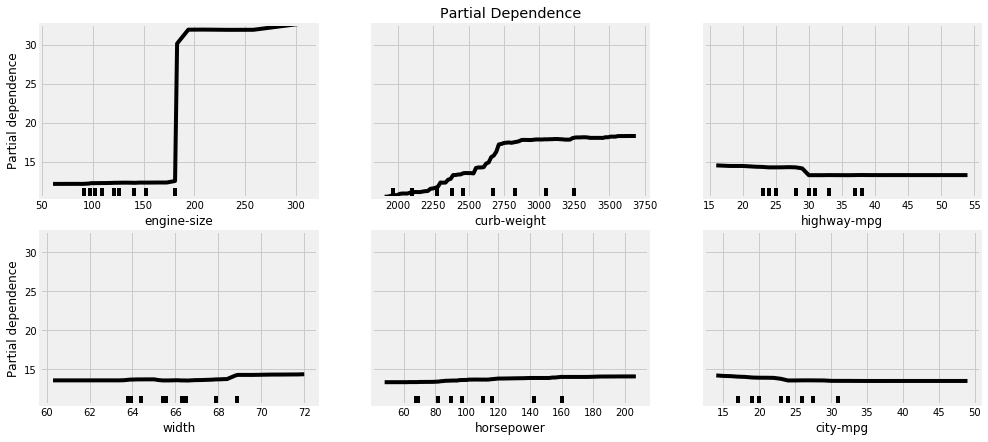

In [719]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharey=False)

top_features = df_feature_importances['Feature'].head(6)

plot_partial_dependence(
    rgr, x_train, 
    features=top_features,
    n_cols=3, 
    n_jobs=-1,
    line_kw={'color': 'k'},
    ax=ax
) 

ax.set_title('Partial Dependence')

fig.show()

In [695]:
# Shall I also write about permutation_importance.
# Tip: impurity-based feature importance can inflate the importance of numerical features.
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

## Bagging Regressor

In [348]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Compare to when K > 1; performance is worse then
rgr = BaggingRegressor(
    base_estimator=KNeighborsRegressor(n_neighbors=1),
    n_estimators=200,
)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [435]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        np.sqrt(mean_squared_error(df_test[target], y_test_pred)),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

R2: 0.89, RMSE: 2.23, MAE: 1.43


In [529]:
class ColumnNamesKeeper:
    
    def __init__(self, transformer):
        self._columns = None
        self.transformer = transformer
        
    def __repr__(self):
        return repr(self.transformer)
    
    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)
    
    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)
        
    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x)

In [527]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

numerical_mputer = ColumnNamesKeeper(
    SimpleImputer(
        missing_values=np.nan, 
        strategy='median'
    )
)

categorical_mputer = ColumnNamesKeeper(
    SimpleImputer(
        missing_values=np.nan, 
        strategy='most_frequent'
    )
)

minmax_scaler = ColumnNamesKeeper(
    MinMaxScaler()
) 

onehot_encoder = OneHotEncoder(
    cols=features['categorical'],
    handle_unknown='value'
)

numerical_pipeline = Pipeline(
    [
        ('numerical_mputer', numerical_mputer), 
        ('minmax_scaler', minmax_scaler)
    ]
)

categorical_pipeline = Pipeline(
    [
        ('categorical_mputer', categorical_mputer), 
        ('onehot_encoder', onehot_encoder)
    ]
)

x_train_knn = pd.concat(
    [
        numerical_pipeline.fit_transform(df_train[features['numerical']]), 
        categorical_pipeline.fit_transform(df_train[features['categorical']]),
    ],
    axis=1
)

x_test_knn = pd.concat(
    [
        numerical_pipeline.transform(df_test[features['numerical']]), 
        categorical_pipeline.transform(df_test[features['categorical']]),
    ],
    axis=1
)



rgr = BaggingRegressor(
    base_estimator=KNeighborsRegressor(
        n_neighbors=1
    ),
    n_estimators=200,
)

rgr.fit(x_train_knn, y_train)
y_test_pred = rgr.predict(x_test_knn)

In [528]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        np.sqrt(mean_squared_error(df_test[target], y_test_pred)),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

R2: 0.87, RMSE: 2.50, MAE: 1.75


## Gradient Boosting

In [720]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, loss='ls')

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [721]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.93, MSE: 3.28, MAE: 1.24


In [722]:
# Loss = ls; R2: 0.92, RMSE: 1925.56, MAE: 1398.11
# Loss = lad; R2: 0.89, RMSE: 2274.69, MAE: 1488.76

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


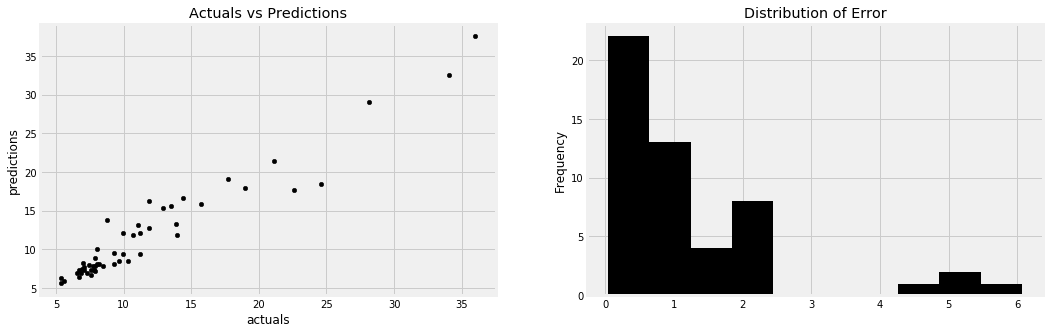

In [723]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()

In [724]:
df_feature_importances = pd.DataFrame(
    {
        'Feature': x_train.columns,
        'Importance': rgr.feature_importances_,
    }
).sort_values(
    'Importance', ascending=False
)

df_feature_importances.head(8)

,Feature,Importance
16,engine-size,0.666323
15,curb-weight,0.187520
20,horsepower,0.028462
23,highway-mpg,0.019504
9,fuel-system,0.018681
22,city-mpg,0.013061
13,width,0.011821
11,wheel-base,0.007614


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


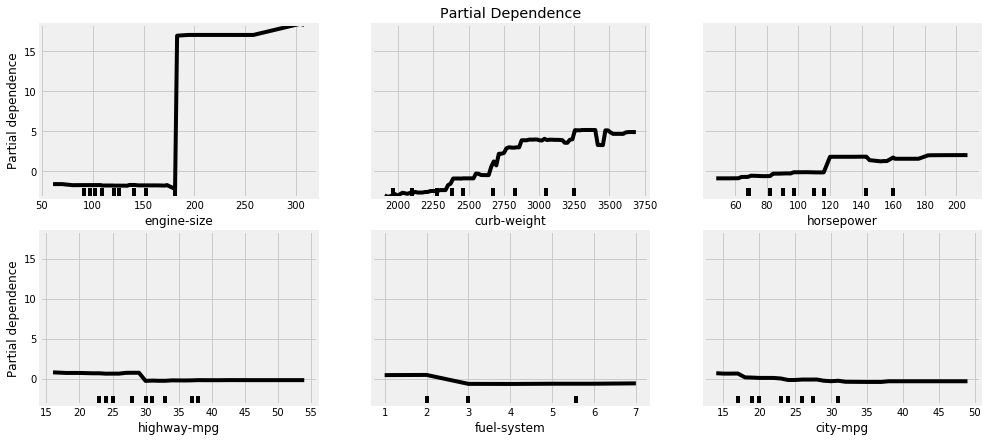

In [725]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharey=False)

top_features = df_feature_importances['Feature'].head(6)

plot_partial_dependence(
    rgr, x_train, 
    features=top_features,
    n_cols=3, 
    n_jobs=-1,
    line_kw={'color': 'k'},
    ax=ax
) 

ax.set_title('Partial Dependence')

fig.show()

## Deviance

In [418]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.02, loss='ls')
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 4.267052298498539


In [419]:
def calculate_deviance(estimator, x_test, y_test):

    train_errors = estimator.train_score_
    test_errors = [
        estimator.loss_(y_test, y_pred_staged) # mean_squared_error(y_test, y_pred_staged)
        for y_pred_staged in estimator.staged_predict(x_test)
    ]

    return pd.DataFrame(
        {
            'n_estimators': range(1, estimator.estimators_.shape[0]+1),
            'train_error': train_errors,
            'test_error': test_errors,
        }
    ).set_index('n_estimators')

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


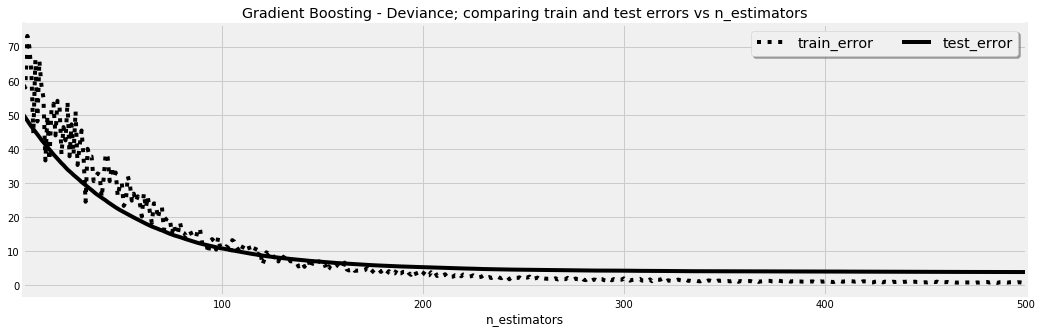

In [559]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_deviance = calculate_deviance(rgr, x_test, y_test)

df_deviance['train_error'].plot(
    kind='line',
    color='k',
    linestyle=':',
    ax=ax
)

df_deviance['test_error'].plot(
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_title('Gradient Boosting - Deviance; comparing train and test errors vs n_estimators')

ax.legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


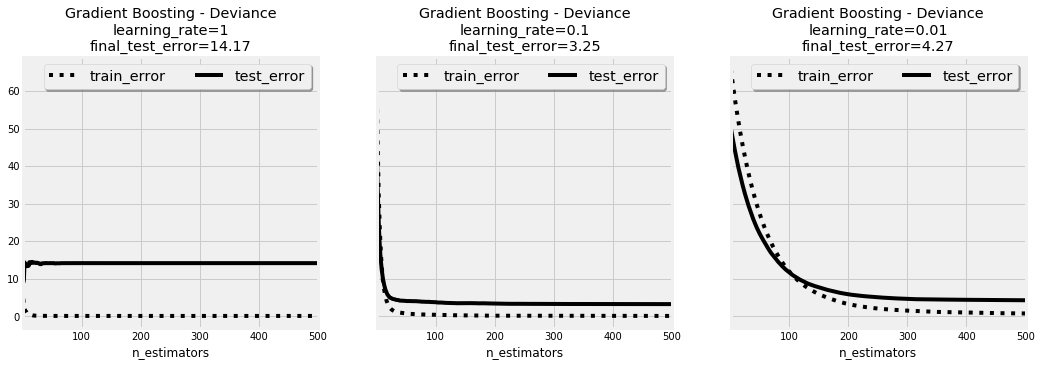

In [560]:
learning_rates = [1, 0.1, 0.01]

fig, axs = plt.subplots(1, len(learning_rates), figsize=(16, 5), sharey=True)

for i, learning_rate in enumerate(learning_rates):
    
    rgr = GradientBoostingRegressor(n_estimators=500, learning_rate=learning_rate, loss='ls')
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=f'Gradient Boosting - Deviance\nlearning_rate={learning_rate}\nfinal_test_error={final_test_error:.2f}',
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


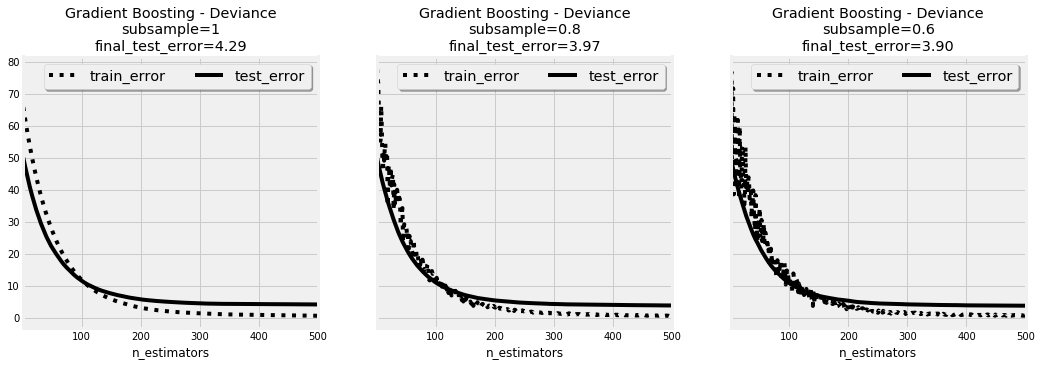

In [561]:
subsamples = [1, 0.8, 0.6]

fig, axs = plt.subplots(1, len(learning_rates), figsize=(16, 5), sharey=True)

for i, subsample in enumerate(subsamples):
    
    rgr = GradientBoostingRegressor(
        n_estimators=500, subsample=subsample, learning_rate=0.01, loss='ls'
    )
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=f'Gradient Boosting - Deviance\nsubsample={subsample}\nfinal_test_error={final_test_error:.2f}',
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

## Early Stopping
n_iter_no_change, tol

## Dynamic Learning Rate

In [677]:
def lr_changer(n, estimator, params):
    if n % 10:
        estimator.learning_rate = 0.01
    else:
        estimator.learning_rate = 0.1
    return False

In [680]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, loss='ls')
rgr.fit(x_train, y_train, monitor=lr_changer)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 26.829986920118746


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


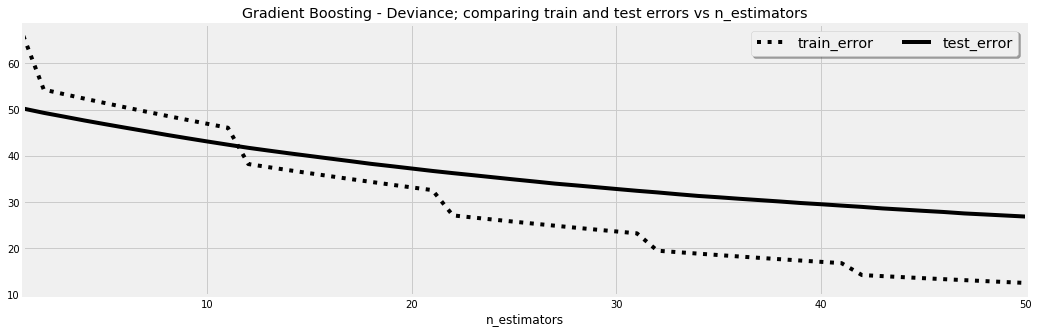

In [681]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_deviance = calculate_deviance(rgr, x_test, y_test)

df_deviance['train_error'].plot(
    kind='line',
    color='k',
    linestyle=':',
    ax=ax
)

df_deviance['test_error'].plot(
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_title('Gradient Boosting - Deviance; comparing train and test errors vs n_estimators')

ax.legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

## Regression Ranges

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


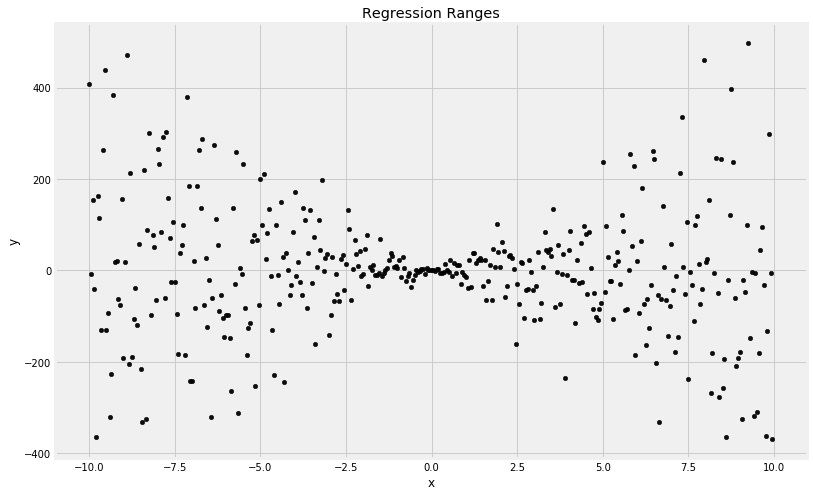

In [689]:
x_sample = np.arange(-10, 10, 0.05)
y_sample = np.random.normal(loc=0, scale=25, size=x_sample.shape[0]) 
y_sample *= x_sample 

pd_random_samples = pd.DataFrame(
    {
        'x': x_sample,
        'y': y_sample
    }
)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='Regression Ranges', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


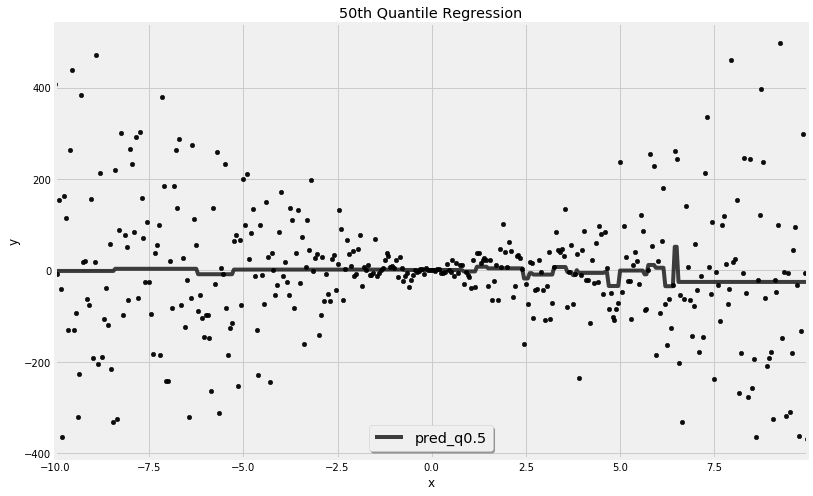

In [692]:
from sklearn.ensemble import GradientBoostingRegressor

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='50th Quantile Regression', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

for quantile in [0.5]:
    
    rgr = GradientBoostingRegressor(n_estimators=10, loss='quantile', alpha=quantile)
    rgr.fit(pd_random_samples[['x']], pd_random_samples['y'])
    pd_random_samples[f'pred_q{quantile}'] = rgr.predict(pd_random_samples[['x']])
    
    pd_random_samples.plot(
        kind='line', x='x', y=f'pred_q{quantile}', linestyle='-', alpha=0.75, color='k', ax=ax
    )
    
ax.legend(ncol=1, fontsize='x-large', shadow=True)

fig.show()
    

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


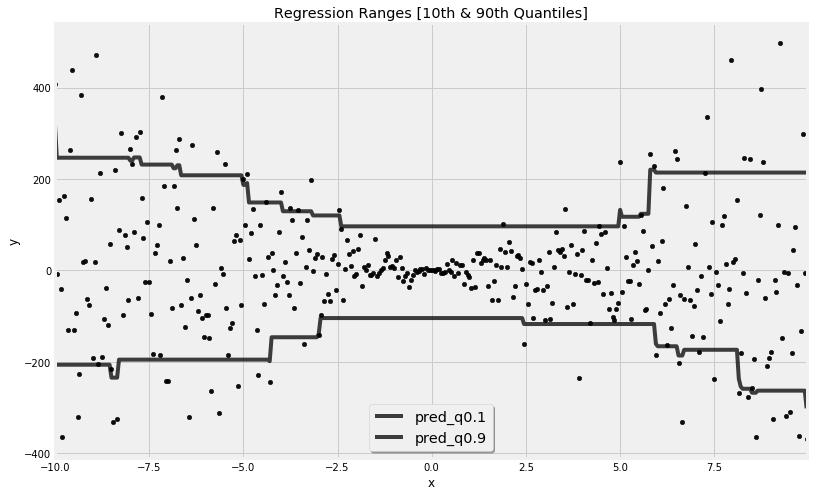

In [694]:
from sklearn.ensemble import GradientBoostingRegressor

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='Regression Ranges [10th & 90th Quantiles]', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

for quantile in [0.1, 0.9]:
    
    rgr = GradientBoostingRegressor(n_estimators=10, loss='quantile', alpha=quantile)
    rgr.fit(pd_random_samples[['x']], pd_random_samples['y'])
    pd_random_samples[f'pred_q{quantile}'] = rgr.predict(pd_random_samples[['x']])
    
    pd_random_samples.plot(
        kind='line', x='x', y=f'pred_q{quantile}', linestyle='-', alpha=0.75, color='k', ax=ax
    )
    
ax.legend(ncol=1, fontsize='x-large', shadow=True)

fig.show()
    

## Ada Boost

In [530]:
from sklearn.ensemble import AdaBoostRegressor

In [531]:
rgr = AdaBoostRegressor(n_estimators=100)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 5.730486595956148


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


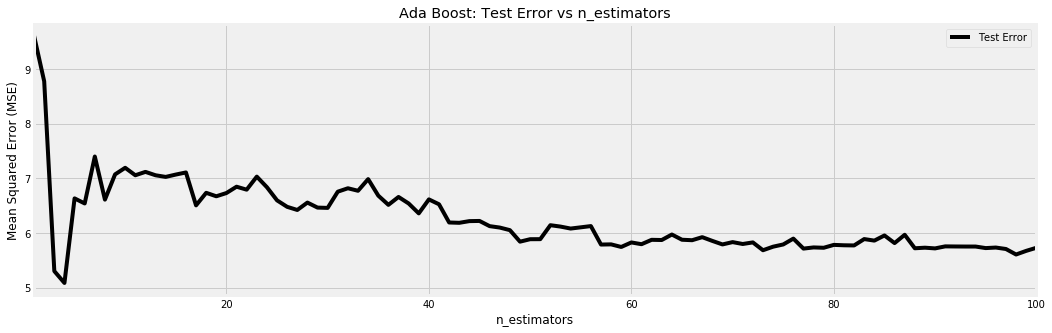

In [556]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=True)

pd.DataFrame(
    [
        (n, mean_squared_error(y_test, y_pred_staged))
        for n, y_pred_staged in enumerate(rgr.staged_predict(x_test), 1)
    ],
    columns=['n', 'Test Error']
).set_index('n').plot(
    title=f'Ada Boost: Test Error vs n_estimators',
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Squared Error (MSE)')

fig.show()


## Random Trees Embedding

In [603]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.linear_model import Ridge

rgr = make_pipeline(RandomTreesEmbedding(), Ridge())
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 3.899599726541862


In [605]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.92, MSE: 3.90, MAE: 1.40


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


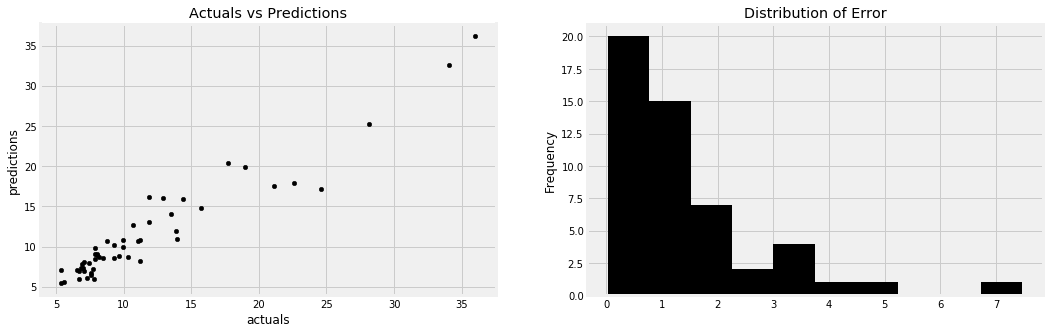

In [604]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()